In [1]:
import gym
import numpy as np
from IPython.display import clear_output
from collections import deque
import matplotlib.pyplot as plt
import random

In [2]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as layers

In [3]:
learning_rate=0.01
model = keras.Sequential([
    layers.Dense(2, input_shape=(4,))
])
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.MeanSquaredError()
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [4]:
epsilon = 1.0
exp_buffer = deque(maxlen=1000)
gamma = 0.99#discount rate

In [5]:
env = gym.make("CartPole-v1")
print(env)

<TimeLimit<CartPoleEnv<CartPole-v1>>>


In [6]:
def train_from_buffer():
    global epsilon, exp_buffer
    batch = random.choices(exp_buffer, k=min(50,len(exp_buffer)))
    #print(f"batch: {batch}\n")
    # batch starts as a list of all the experiences.
    # zip(*batches) creates a zip object (iterable without indexed access) where each 
    # item is a tuple containing all the categories of one experience (for example, one tuple contains all the states)
    # then, each tuple is converted to a list
    states, actions, next_states, rewards, done_list, info_list = (list(col) for col in zip(*batch))
    predictions = model.predict_on_batch(np.array(states))
    next_predictions = model.predict_on_batch(np.array(next_states))
    
    q_next_list = [np.max(pred) for pred in next_predictions]
    q_target_list = [reward*(1-int(done))+gamma*q_next*done for (reward, q_next, done) in zip(rewards,q_next_list,done_list)]
    
    for prediction,q_target in zip(predictions,q_target_list):
        prediction[action] = q_target
    
    model.train_on_batch(np.array(states),np.array(predictions))
    if epsilon>0.01:
        epsilon*=0.99

In [7]:
def get_action(state):
    return np.argmax(model.predict(np.expand_dims(state,0))[0]) if random.random()>epsilon else random.randint(0,1)

In [8]:
exp_buffer.clear()
episodes = 100
rewards = []
epsilon = 1.0
try:
    print("starting!")
    for episode in range(episodes):
        done = False
        state = env.reset()
        next_state = None
        total_reward=0
        while not done:
#             print(len(exp_buffer))
            action = get_action(state)
            #next_state, reward, done, info = env.step(action)
            experience = env.step(action)
            done = experience[2]
            exp_buffer.append([state, action, *experience])
            total_reward+=experience[1]
            train_from_buffer()
            #print(len(exp_buffer))
            #clear_output(wait=True
        rewards.append(total_reward)
        print(f"reward for episode {episode} (epsilon = {epsilon}): {total_reward}")
    print("done!")
finally:
    env.close()

starting!
reward for episode 0 (epsilon = 0.8345137614500874): 18.0
reward for episode 1 (epsilon = 0.6689717585696803): 22.0
reward for episode 2 (epsilon = 0.5582661385478638): 18.0
reward for episode 3 (epsilon = 0.49483865960020695): 12.0
reward for episode 4 (epsilon = 0.41294967113388825): 18.0
reward for episode 5 (epsilon = 0.3516092065580223): 16.0
reward for episode 6 (epsilon = 0.3212010745647914): 9.0
reward for episode 7 (epsilon = 0.28186069554046345): 13.0
reward for episode 8 (epsilon = 0.24241664604458016): 15.0
reward for episode 9 (epsilon = 0.22145178723886094): 9.0
reward for episode 10 (epsilon = 0.1962915140230253): 12.0
reward for episode 11 (epsilon = 0.18112695312597027): 8.0
reward for episode 12 (epsilon = 0.15577974928671176): 15.0
reward for episode 13 (epsilon = 0.13808081308747278): 12.0
reward for episode 14 (epsilon = 0.12741333767875881): 8.0
reward for episode 15 (epsilon = 0.11523033871371341): 10.0
reward for episode 16 (epsilon = 0.103170130301576

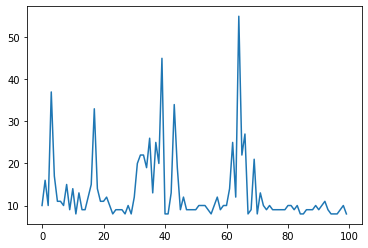

In [76]:
plt.plot(rewards)
plt.show()

In [16]:
x = keras.layers.Dense(2,input_shape=(4,))
input = np.expand_dims([1,2,3,4],0)
print(input.shape)
print(x(input))

(1, 4)
tf.Tensor([[-2.4178839 -4.444152 ]], shape=(1, 2), dtype=float32)
